# PS 1: Data Exploration & Visualization

## 1. Obtaining Data

In [185]:
!pip install -q yfinance plotly mplfinance

import yfinance as yf
import mplfinance as mpf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

In [186]:
plt.style.use('seaborn-v0_8-darkgrid')
pd.set_option('display.max_columns', None)

In [187]:
def download_flat_yf(ticker, start, end):
    data = yf.download(ticker, start=start, end=end, progress=False)
    data = data.xs(ticker, axis=1, level=1)
    data.columns.name = None
    return data

stock_symbol = 'TCS.NS'

data = download_flat_yf(stock_symbol, start='2024-05-25', end='2025-05-25')
data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2024-05-27,3768.718262,3828.770148,3763.134370,3776.506340,1841538
2024-05-28,3761.713867,3791.201082,3752.015541,3779.445420,1801993
2024-05-29,3726.201904,3770.530547,3722.626319,3770.530547,1568095
2024-05-30,3660.027588,3717.140323,3639.797909,3700.094708,2919230
2024-05-31,3596.203857,3673.448448,3579.354123,3663.847943,10956800


In [188]:
data.dropna(inplace=True)
data.index = pd.to_datetime(data.index)

print("\nAfter Cleaning:")
print(data.head())
print("\nNull values:\n", data.isnull().sum())
print("\nIndex type:", type(data.index))


After Cleaning:
                  Close         High          Low         Open    Volume
Date                                                                    
2024-05-27  3768.718262  3828.770148  3763.134370  3776.506340   1841538
2024-05-28  3761.713867  3791.201082  3752.015541  3779.445420   1801993
2024-05-29  3726.201904  3770.530547  3722.626319  3770.530547   1568095
2024-05-30  3660.027588  3717.140323  3639.797909  3700.094708   2919230
2024-05-31  3596.203857  3673.448448  3579.354123  3663.847943  10956800

Null values:
 Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


## 2. Visual Insight

In [189]:
fig = go.Figure(
    data=[
        go.Candlestick(
            x=data.index,
            open=data['Open'],
            high=data['High'],
            low=data['Low'],
            close=data['Close'],
            name='Candlesticks'
        )
    ]
)
fig.update_layout(
    title=f"Candlestick Chart - {stock_symbol}",
    xaxis_title='Date',
    yaxis_title='Price (INR)',
    xaxis_rangeslider_visible=False,
    template='plotly_dark',
    height=600
)

fig.show()

### 1.Bearish in FEB 2025

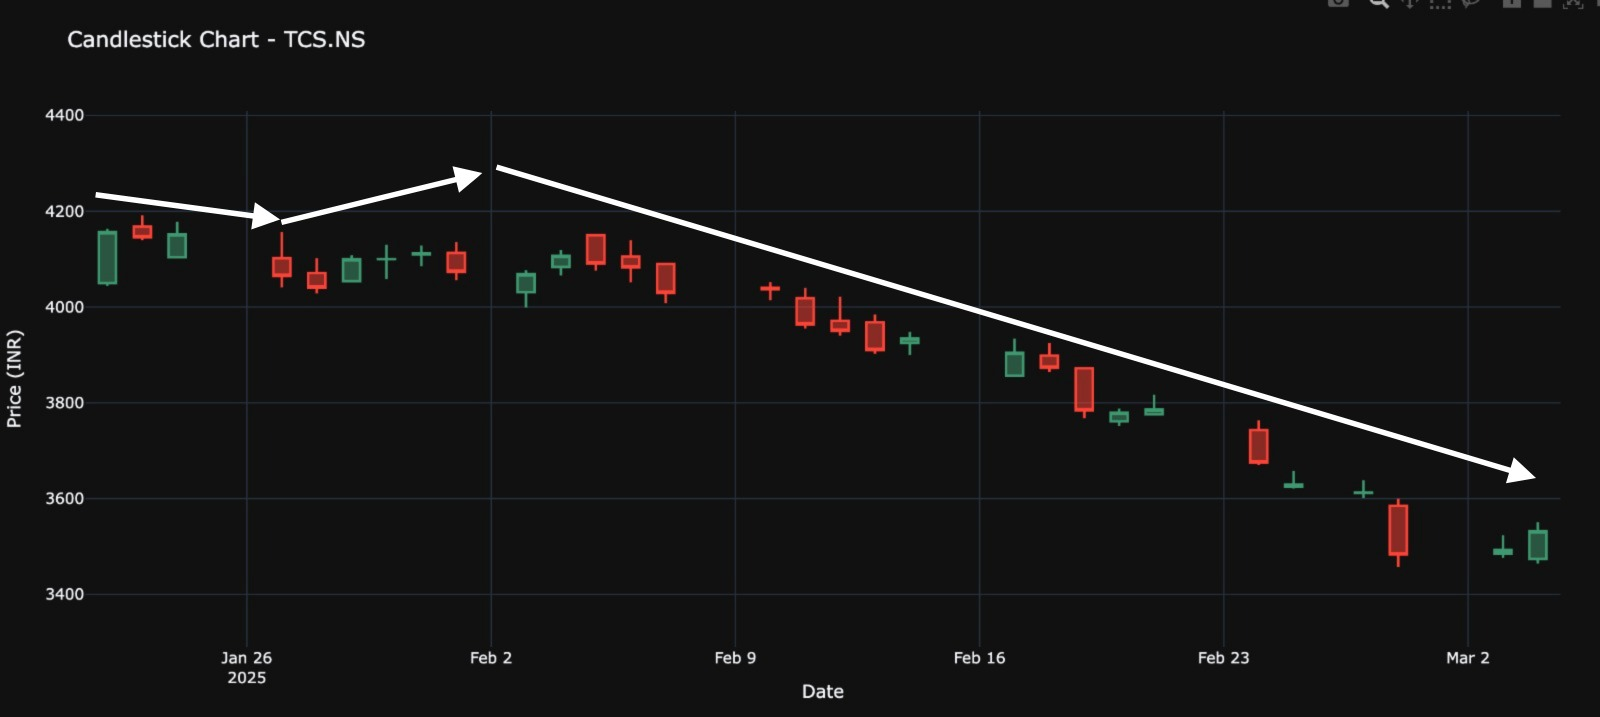

TCS shares declined in February 2025 as a result of a "double whammy" of reasons. In the first place, **global economic uncertainty**, particularly fear of a slowdown in the US, prompted clients to tread carefully. This resulted in delayed IT projects and budget cuts, directly affecting demand for TCS's offerings. Apprehension of possible US tariffs also contributed to this uncertainty, jeopardizing making Indian IT services non-competitive.

Secondly, this conservative atmosphere found expression in **TCS's disappointing Q4 FY25 results**. Its weakest revenue growth in four years and its first negative profit growth in some quarters were reported by the company. The company's underperformance, especially in its biggest market, North America, led analysts to lower their ratings of IT stocks, which heightened selling pressure on TCS shares.

### 2.Bullish in NOV-DEC 2024


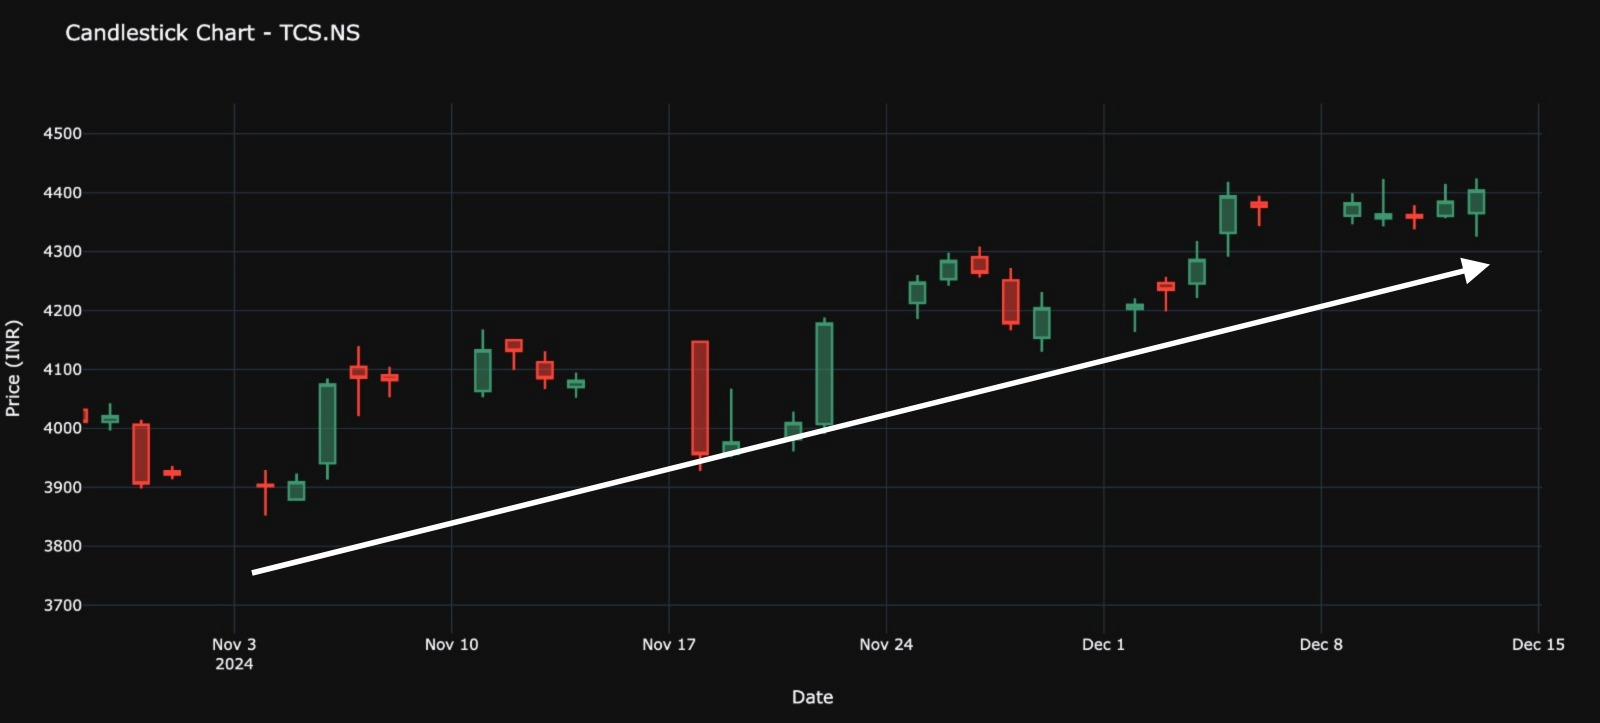

The positive mood in TCS stocks in November and December 2024 was due to two fundamental reasons:

Most importantly, **optimism regarding a meaningful IT sector comeback in early 2025** dominated. Investors were expecting a turnaround in client IT expenditure, especially as enterprises completed their Calendar Year 2025 budgeting. TCS's solid Total Contract Value (TCV) numbers, led by more than $10 billion for Q3 FY25, reaffirmed faith in its strong order book, reflecting a good pipeline to drive revenue expansion in the future despite anticipated seasonality softness.

Second, a **firm and encouraging larger Indian market** gave it an important tailwind. The Indian equity market as a whole enjoyed a strong favorable momentum driven primarily by strong domestic institutional and retail investor flows. The huge domestic liquidity helped to cushion any possible foreign capital outflows, which increased the confidence of the market. Analysts remained optimistic about India's economic growth and corporate results, giving a favorable positioning to big-cap IT companies such as TCS. These coupled elements formed a favorable investment environment, pushing TCS's stock price to rise.

# PS 2: Returns & Volatility

## 1. Return Computation

In [167]:
data['Daily Return'] = data['Close'].pct_change()

data['Log Return'] = np.log(data['Close'] / data['Close'].shift(1))
data[['Daily Return', 'Log Return']].dropna().head()

,Daily Return,Log Return
Date,,
2024-05-28,-0.001859,-0.001860
2024-05-29,-0.009440,-0.009485
2024-05-30,-0.017759,-0.017919
2024-05-31,-0.017438,-0.017592
2024-06-03,0.008690,0.008652


In [168]:
fig1 = px.line(data, x=data.index, y='Daily Return', title=f'{stock_symbol} Simple Returns')
fig1.show()

fig2 = px.line(data, x=data.index, y='Log Return', title=f'{stock_symbol} Log Returns')
fig2.show()

Why Simple vs. Log Returns Looks **Similar** ?
Because for small daily changes (like 1% or 2%), simple and log returns are nearly identical. That’s because the formula for log returns (ln(P_t / P_{t-1})) becomes very close to the simple return((P_t / P_{t-1}) - 1)  when the change is small. So, in most day-to-day stock movements, you won’t see much difference.  

## 2. Volatility Estimation

In [171]:
window = 14

data_clean = data.copy()

data_clean['Rolling_Volatility_14D'] = returns['Log_Return'].rolling(window=window).std()

vol_df = data_clean[['Close', 'Rolling_Volatility_14D']].dropna()

vol_df.head()

,Close,Rolling_Volatility_14D
Date,,
2024-08-02,4205.585938,1.425817
2024-08-09,4152.267578,1.449786
2024-08-12,4119.766113,1.449975
2024-08-13,4121.043457,1.436394
2024-08-21,4469.180664,1.442976


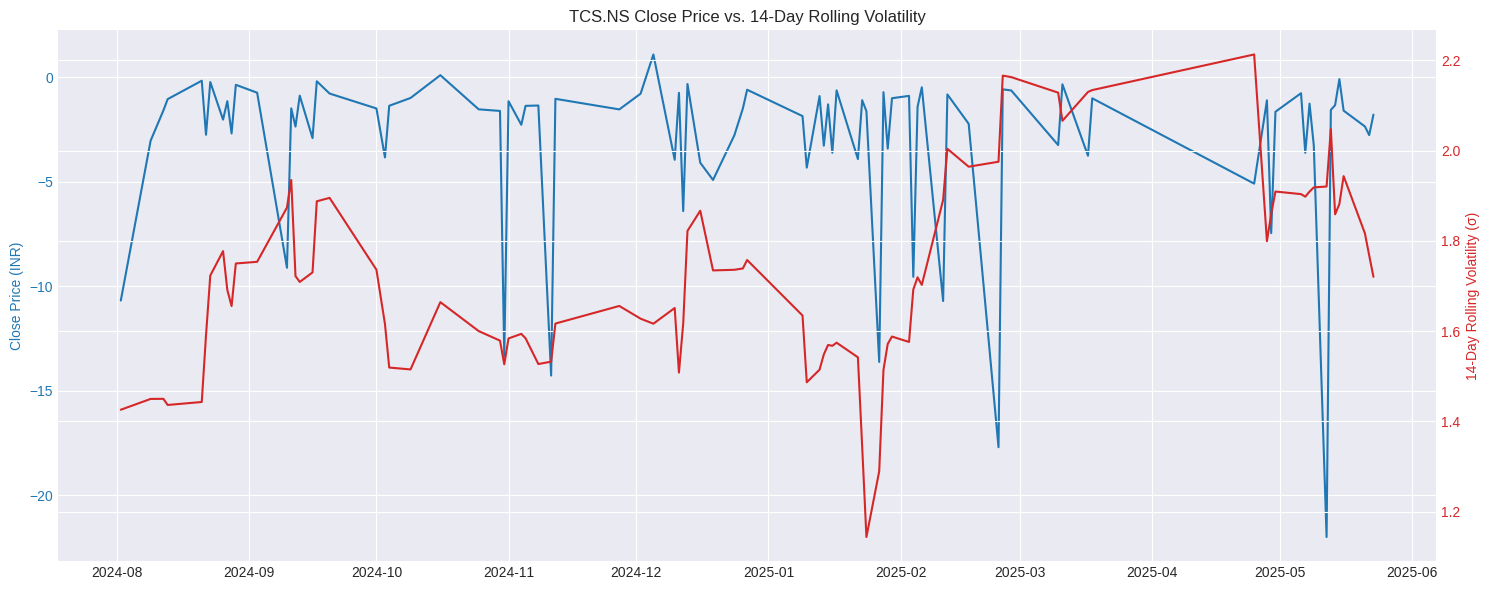

In [170]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.plot(vol_df.index, vol_df['Close'], color='tab:blue', label='Close Price')
ax1.set_ylabel("Close Price (INR)", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(vol_df.index, vol_df['Rolling_Volatility_14D'], color='tab:red', label='14-Day Rolling Volatility')
ax2.set_ylabel("14-Day Rolling Volatility (σ)", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title(f"{stock_symbol} Close Price vs. 14-Day Rolling Volatility")
fig.tight_layout()
plt.show()

# PS 3: The Probability Paradox

## Part 1: Theory vs Reality

In [173]:
import pandas as pd
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

df = data.copy()

df['Daily Return'] = df['Close'].pct_change()
df['Direction'] = np.where(df['Daily Return'] > 0, 'UP', 'DOWN')

P(UP) = 0.4656
P(Exactly 6 UP days in 10) = 0.1745
P(At least 8 UP days in 10) = 0.0344


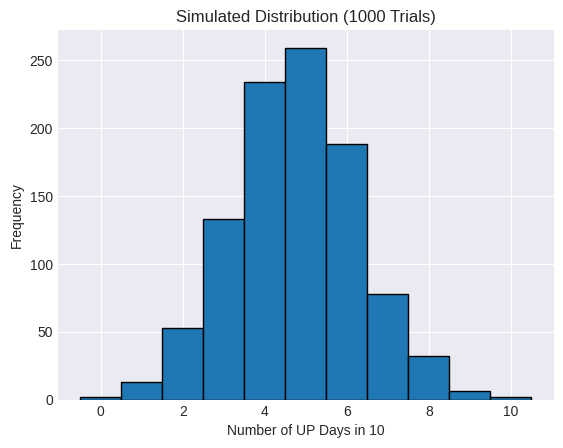

In [176]:
p_up = (df['Direction'] == 'UP').mean()
print(f"P(UP) = {p_up:.4f}")

n = 10
k1 = 6
k2 = 8

prob_6_up = binom.pmf(k1, n, p_up)
prob_at_least_8_up = binom.sf(k2 - 1, n, p_up)

print(f"P(Exactly 6 UP days in 10) = {prob_6_up:.4f}")
print(f"P(At least 8 UP days in 10) = {prob_at_least_8_up:.4f}")

simulations = 1000
results = np.random.binomial(n=10, p=p_up, size=simulations)

plt.hist(results, bins=range(0, 12), edgecolor='black', align='left')
plt.xlabel('Number of UP Days in 10')
plt.ylabel('Frequency')
plt.title('Simulated Distribution (1000 Trials)')
plt.grid(True)
plt.show()

## Part 2: The Paradox

In [182]:
df=df.replace([np.inf, -np.inf], np.nan)
df=df.dropna(subset=['Daily Return'])

df['Direction']=np.where(df['Daily Return'] > 0, 'UP', 'DOWN')

avg_up = df[df['Direction'] == 'UP']['Daily Return'].mean()
avg_down = df[df['Direction'] == 'DOWN']['Daily Return'].mean()

net_return = 6 * avg_up + 4 * avg_down

print("For TCS over the last 1 year:")
print(f"Average return on UP days={avg_up:.4f}%")
print(f"Average return on DOWN days={avg_down:.4f}%")
print(f"Net return over 10 days (6 UP, 4 DOWN)={net_return:.4f}%")

For TCS over the last 1 year:
Average return on UP days=0.0101%
Average return on DOWN days=-0.0092%
Net return over 10 days (6 UP, 4 DOWN)=0.0237%


Let’s analyze whether having more "UP" days (e.g., 6 out of 10) always results in profit.

From the stock data:
*   Average UP return (r₁) = 0.0101%
*   Average DOWN return (r₂) = -0.0092%

Let’s say the stock has:

*   6 UP days total gain = 6 × r₁ = 6 × (0.0101) = **0.0606**
*   4 DOWN days total loss = 4 × r₂ = 4 × (-0.0092) = **-0.0368**

Total net return= 6r₁ + 4r₂ = 0.0606 - 0.0368 = 0.0237% (including next decimals)
#### Conclusion:
TCS shows a strong average return on UP days compared to losses on DOWN days. So, in this specific case, having 6 UP days does result in an overall profit.

However, this doesn’t always hold true. For some stocks, even with a 60% win rate, **smaller wins and larger losses** can lead to net loss.

But flip the case: If the **average gain was smaller**, you could still lose money **even with 6 winning days out of 10** — that’s the paradox.

**This highlights that :**
Just having a high win rate doesn’t guarantee profit. You have to also consider how much you gain when you're right, and how much you lose when you're wrong.

That’s what this question really showed me.
**A high win rate is not enough. You must also consider the average size of gains vs. losses.**


## Part 3: The Ultimate Question

In [184]:
gain = 100
loss = 150

expected_value = gain * p_up - loss * (1 - p_up)
print(f"Expected Value per Trade = ₹{expected_value:.2f}")

Expected Value per Trade = ₹-33.60


Assume that the probability of UP is 0.56.

Gain = ₹100 when UP; Loss = ₹150 when DOWN; Expected Value = (100 × 0.56) - (150 × 0.44) = ₹56 - ₹66 = -₹10

The magnitude of the loss is greater than the magnitude of the gain, even though the odds of winning are higher than those of losing. Therefore, **I would reject this bet**.

This exemplifies the fundamental idea in trading and investing: win rate is not as important as risk-reward balance. Many inexperienced traders become fixated on win rates, which ultimately results in losses.